In [1]:
pip install opencv-python
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [180]:
# STORE FILE NAMES

def import_names(folder_dir):
    import os
    from os import listdir
    
    stored_images = []
    
    for i in os.listdir(folder_dir):
        stored_images.append(i)
    return stored_images

# CONVERT IMAGE TO TEXT

def image_to_text(directory):
    img = cv2.imread(directory)
    text = pytesseract.image_to_string(img)
    return text

# BRAND ASSIGNER

def brand_select(row):
    if row['64 Audio Flag'] == 1:
        val = "64 Audio"
    elif row['UE Flag'] == 1:
        val = "Ultimate Ears"
    elif row["JH Audio Flag"] == 1:
        val = "JH Audio"
    else:
        val = "Westone"
    return val

In [ ]:
# Read in image names 

folder_dir = r"C:\Users\Theo Lee\Desktop\soundcat_custom_gallery" # set this to the folder the images are stored 
names = import_names(folder_dir)

In [136]:
# Check file size

full_names = []
cleaned_names = []

for i in names:
    path = r'C:\Users\Theo Lee\Desktop\soundcat_custom_gallery'
    full_path = (path+"\\"+i)
    full_names.append(full_path)
    
import os 
for i in full_names:
    size = os.path.getsize(i)
    if size < 75000: # see cell below, take lower quartile  
        cleaned_names.append(i)
       

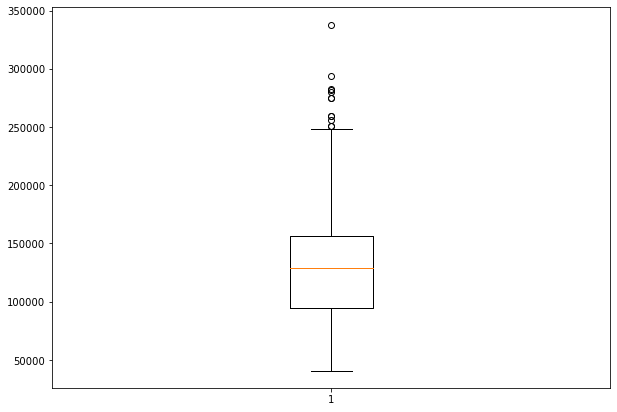

In [140]:
# visualizing split for file size cutoff
sizes = []
for i in full_names:
    size = os.path.getsize(i)
    sizes.append(size)

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(sizes)
 
# show plot
plt.show()

In [285]:
# Convert images to text and store in dataframe

text_data = []
date_data = []

for i in cleaned_names:
    text_length = len(image_to_text(i))
    if text_length > 5: # to remove posts with no text
        text_data.append(image_to_text(i))
        date_data.append(i[50:60]) # slice date
        
import pandas as pd
d = {'Text':text_data,'Date':date_data}
df = pd.DataFrame(d)
df.head(10)

,Text,Date
0,[Ultimate Ears] UE11PRO\nO|BA - BHA / EPEX - B...,2022-04-27
1,[64AUDIO] A12t\nH|2 / BE'O\n,2022-04-27
2,[Ultimate Ears] UE LIVE\nAIA|E| - XFL] / NCT -...,2022-04-27
3,[64AUDIO] N8\nAle! / Kim Se Ri\n,2022-04-29
4,[64AUDIO] A3t\nStH] / Han Eun Bi\n,2022-04-29
5,[64AUDIO] A18t\n,2022-04-29
6,[Ultimate Ears] UE LIVE\nAs - AL PG / EXO - XI...,2022-04-29
7,[64AUDIO] A18t\nO|Sf9] ALY - 212} / LOONA - Ki...,2022-04-29
8,(JHAUDIO] Roxanne\nBAELAA - B1S4 / MONSTA X - ...,2022-05-04
9,[JHAUDIO] LOLA\nWetA& - 4/9! / E'LAST - CHOI IN\n,2022-05-04


In [286]:
df_copy = df.copy()

In [324]:
df = df_copy

In [325]:
# formatting data
import numpy as np

df['64 Audio Flag'] = np.where(df['Text'].str.contains('64'), 1, 0) # flags for checking in Tableau 
df['UE Flag'] = np.where(df['Text'].str.contains('Ultimate Ears'),1,0)
df['JH Audio Flag'] = np.where(df['Text'].str.contains('JHA'),1,0)
df['Westone Flag'] = np.where(df['Text'].str.contains('Westone'),1,0)
df['Brand'] = df.apply(brand_select, axis=1) # check brand 

df2 = df['Text'].str.split('/', expand=True)[1].str.split('\n',expand=True)[0] # get artist
df = df.join(df2)
df.rename({0: 'Artist'}, axis=1, inplace=True)

df3 = df['Text'].str.split(']',expand=True)[1].str.split('\n',expand=True)[0] # get IEM
df3.head()
df = df.join(df3)
df.rename({0:'IEM'}, axis=1, inplace=True)

df.head(20)

,Text,Date,64 Audio Flag,UE Flag,JH Audio Flag,Westone Flag,Brand,Artist,IEM
0,[Ultimate Ears] UE11PRO\nO|BA - BHA / EPEX - B...,2022-04-27,0,1,0,0,Ultimate Ears,EPEX - BAEKSEUNG,UE11PRO
1,[64AUDIO] A12t\nH|2 / BE'O\n,2022-04-27,1,0,0,0,64 Audio,BE'O,A12t
2,[Ultimate Ears] UE LIVE\nAIA|E| - XFL] / NCT -...,2022-04-27,0,1,0,0,Ultimate Ears,NCT - JOHNNY,UE LIVE
3,[64AUDIO] N8\nAle! / Kim Se Ri\n,2022-04-29,1,0,0,0,64 Audio,Kim Se Ri,N8
4,[64AUDIO] A3t\nStH] / Han Eun Bi\n,2022-04-29,1,0,0,0,64 Audio,Han Eun Bi,A3t
5,[64AUDIO] A18t\n,2022-04-29,1,0,0,0,64 Audio,None,A18t
6,[Ultimate Ears] UE LIVE\nAs - AL PG / EXO - XI...,2022-04-29,0,1,0,0,Ultimate Ears,EXO - XIUMIN,UE LIVE
7,[64AUDIO] A18t\nO|Sf9] ALY - 212} / LOONA - Ki...,2022-04-29,1,0,0,0,64 Audio,LOONA - Kim Lip,A18t
8,(JHAUDIO] Roxanne\nBAELAA - B1S4 / MONSTA X - ...,2022-05-04,0,0,1,0,JH Audio,MONSTA X - MINHYUK,Roxanne
9,[JHAUDIO] LOLA\nWetA& - 4/9! / E'LAST - CHOI IN\n,2022-05-04,0,0,1,0,JH Audio,9!,LOLA


In [228]:
# export as Excel file 
df.to_excel(r"C:\Users\Theo Lee\Downloads\SoundCatData.xlsx")